# Analysis of Hotel Customer Sentiments

- Sentiment analysis is part of the Natural Language Processing (NLP) techniques that consists in extracting emotions related to some raw texts. This is usually used on social media posts and customer reviews in order to automatically understand if some users are positive or negative and why. The goal of this study is to show how sentiment analysis can be performed using python. Here are some of the main libraries we will use:
  - NLTK: the most famous python module for NLP techniques.
  - Gensim: a topic-modeling and vector space modeling toolkit.
  - Scikit-learn: the most used python machine-learning library.
  
- We will use here some hotel review data. Each observation consists of one customer review for one hotel. Each customer review is composed of textual feedback of the customer's experience at the hotel and an overall rating.

- For each textual review, we want to predict if it corresponds to a good review (the customer is happy) or to a bad one (the customer is not satisfied). The review's overall ratings can range from 2.5/10 to 10/10.

   In order to simplify the problem we will split those into two categories:

   - bad reviews have overall ratings < 5
   -  good reviews have overall ratings > = 5
     
     
     
- The challenge here is to be able to predict this information using only the raw textual data from the review.

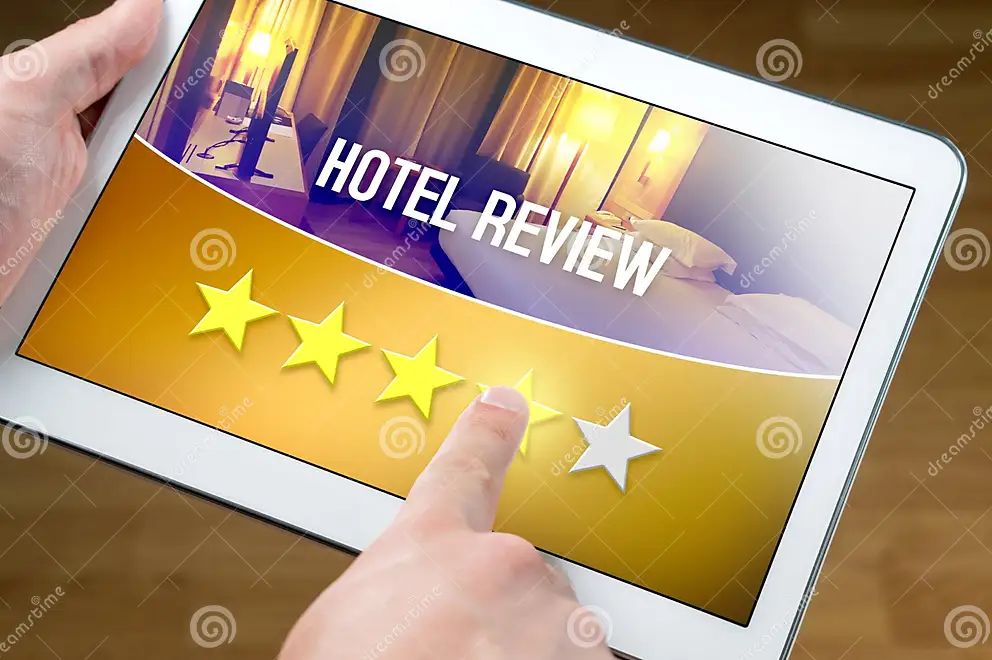

# About Dataset

### Acknowledgements
- The data was scraped from Booking.com. All data in the file is publicly available to everyone already. Please be noted that data is originally owned by Booking.com.

### Data Context
- This dataset contains 515,000 customer reviews and scoring of 1493 luxury hotels across Europe. Meanwhile, the geographical location of hotels are also provided for further analysis.

### Data Content
The csv file contains 17 fields. The description of each field is as below:

- Hotel_Address: Address of hotel.
- Review_Date: Date when reviewer posted the corresponding review.
- Average_Score: Average Score of the hotel, calculated based on the latest comment in the last year.
- Hotel_Name: Name of Hotel
- Reviewer_Nationality: Nationality of Reviewer
- Negative_Review: Negative Review the reviewer gave to the hotel. If the reviewer does not give the negative review, then it should be: 'No Negative'
- Review_Total_Negative_Word_Counts: Total number of words in the negative review.
- Positive_Review: Positive Review the reviewer gave to the hotel. If the reviewer does not give the negative review, then it should be: 'No Positive'
- Review_Total_Positive_Word_Counts: Total number of words in the positive review.
- Reviewer_Score: Score the reviewer has given to the hotel, based on his/her experience
- Total_Number_of_Reviews_Reviewer_Has_Given: Number of Reviews the reviewers has given in the past.
- Total_Number_of_Reviews: Total number of valid reviews the hotel has.
- Tags: Tags reviewer gave the hotel.
- days_since_review: Duration between the review date and scrape date.
- Additional_Number_of_Scoring: There are also some guests who just made a scoring on the service rather than a review. This number indicates how many valid scores without review in there.
- lat: Latitude of the hotel
- lng: longtitude of the hote


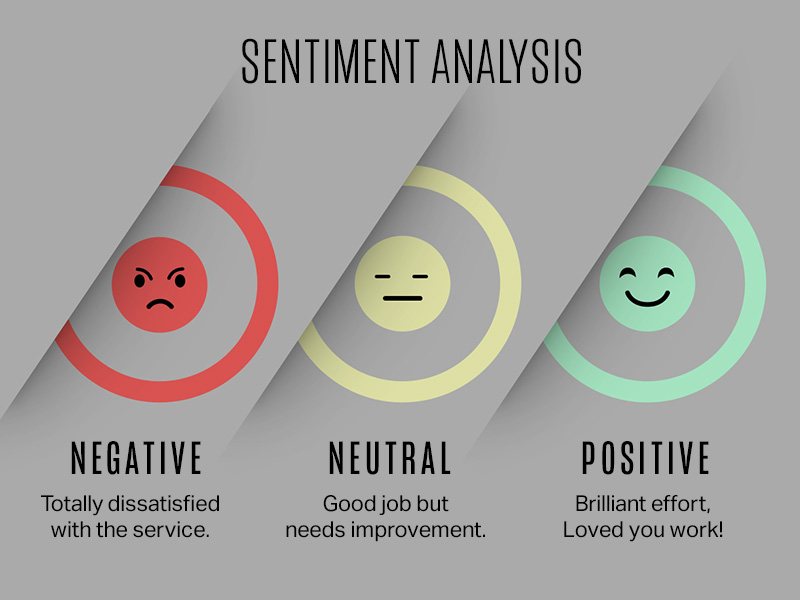

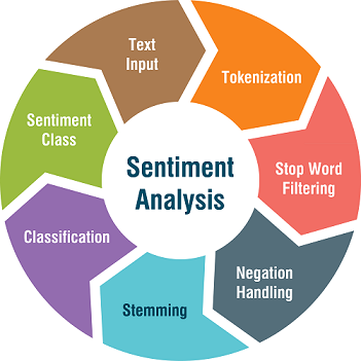

## Import Library

In [1]:
import pandas as pd
import string

from nltk.corpus import wordnet
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.tokenize import WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer
#  https://www.nltk.org/data.html

# I added the necessary libraries during coding.

## Read data

In [2]:
reviews_df= pd.read_csv("Hotel_Reviews.csv")


In [3]:
reviews_df.head()

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,52.360576,4.915968
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,52.360576,4.915968


In [4]:
reviews_df.shape

(515738, 17)

In [5]:
reviews_df.describe()

,Additional_Number_of_Scoring,Average_Score,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,lat,lng
count,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,512470.000000,512470.000000
mean,498.081836,8.397487,18.539450,2743.743944,17.776458,7.166001,8.395077,49.442439,2.823803
std,500.538467,0.548048,29.690831,2317.464868,21.804185,11.040228,1.637856,3.466325,4.579425
min,1.000000,5.200000,0.000000,43.000000,0.000000,1.000000,2.500000,41.328376,-0.369758
25%,169.000000,8.100000,2.000000,1161.000000,5.000000,1.000000,7.500000,48.214662,-0.143372
50%,341.000000,8.400000,9.000000,2134.000000,11.000000,3.000000,8.800000,51.499981,0.010607
75%,660.000000,8.800000,23.000000,3613.000000,22.000000,8.000000,9.600000,51.516288,4.834443
max,2682.000000,9.800000,408.000000,16670.000000,395.000000,355.000000,10.000000,52.400181,16.429233


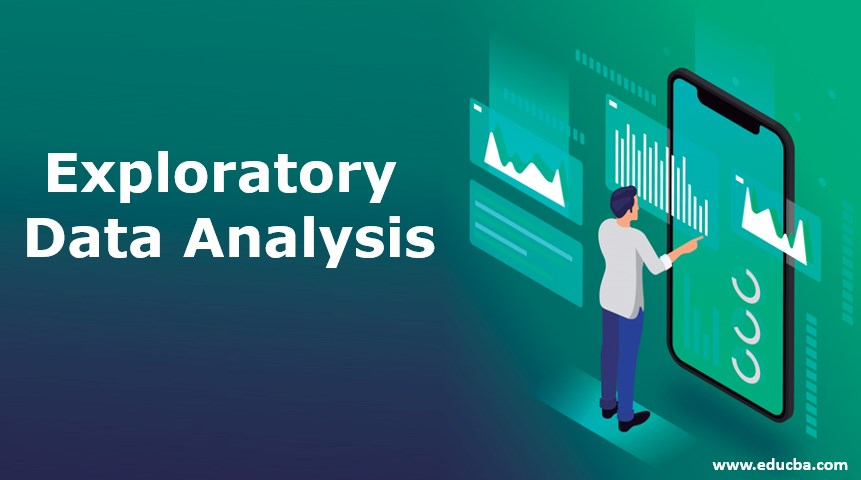

In [6]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515738 entries, 0 to 515737
Data columns (total 17 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   Hotel_Address                               515738 non-null  object 
 1   Additional_Number_of_Scoring                515738 non-null  int64  
 2   Review_Date                                 515738 non-null  object 
 3   Average_Score                               515738 non-null  float64
 4   Hotel_Name                                  515738 non-null  object 
 5   Reviewer_Nationality                        515738 non-null  object 
 6   Negative_Review                             515738 non-null  object 
 7   Review_Total_Negative_Word_Counts           515738 non-null  int64  
 8   Total_Number_of_Reviews                     515738 non-null  int64  
 9   Positive_Review                             515738 non-null  object 
 

In [7]:
reviews_df.isnull().sum()

Hotel_Address                                    0
Additional_Number_of_Scoring                     0
Review_Date                                      0
Average_Score                                    0
Hotel_Name                                       0
Reviewer_Nationality                             0
Negative_Review                                  0
Review_Total_Negative_Word_Counts                0
Total_Number_of_Reviews                          0
Positive_Review                                  0
Review_Total_Positive_Word_Counts                0
Total_Number_of_Reviews_Reviewer_Has_Given       0
Reviewer_Score                                   0
Tags                                             0
days_since_review                                0
lat                                           3268
lng                                           3268
dtype: int64

In [8]:
 reviews_df.isnull().sum().sum()

6536

In [9]:
#filling the null valus 

In [10]:
 reviews_df2 =  reviews_df.fillna(value=0)

In [11]:
 reviews_df2.isnull().sum()

Hotel_Address                                 0
Additional_Number_of_Scoring                  0
Review_Date                                   0
Average_Score                                 0
Hotel_Name                                    0
Reviewer_Nationality                          0
Negative_Review                               0
Review_Total_Negative_Word_Counts             0
Total_Number_of_Reviews                       0
Positive_Review                               0
Review_Total_Positive_Word_Counts             0
Total_Number_of_Reviews_Reviewer_Has_Given    0
Reviewer_Score                                0
Tags                                          0
days_since_review                             0
lat                                           0
lng                                           0
dtype: int64

## Append the positive and negative text reviews

In [12]:
reviews_df2["review"] = reviews_df2["Negative_Review"] + reviews_df2["Positive_Review"]


## Create the label

In [13]:
reviews_df2["is_bad_review"] = reviews_df2["Reviewer_Score"].apply(lambda x: 1 if x < 5 else 0)


## Select only relevant columns

In [14]:
reviews_df2 = reviews_df2[["review", "is_bad_review"]]
reviews_df2.head()

,review,is_bad_review
0,I am so angry that i made this post available...,1
1,No Negative No real complaints the hotel was g...,0
2,Rooms are nice but for elderly a bit difficul...,0
3,My room was dirty and I was afraid to walk ba...,1
4,You When I booked with your company on line y...,0


In [15]:
reviews_df2.shape

(515738, 2)

In [16]:
reviews_df2['is_bad_review'].value_counts()

0    493457
1     22281
Name: is_bad_review, dtype: int64

In [17]:
reviews_df2['is_bad_review'].value_counts(normalize=True)

0    0.956798
1    0.043202
Name: is_bad_review, dtype: float64

## Sample data
- Reviews data is sampled in order to speed up computations.

In [18]:
reviews_df2 = reviews_df2.sample(frac = 0.1, replace = False, random_state=42)

## Clean data

- Remove 'No Negative' or 'No Positive' from text
- If the user doesn't leave any negative feedback comment, this will appear as "No Negative" in our data.
- This is the same for the positive comments with the default value "No Positive".
- We have to remove those parts from our texts.

In [19]:
reviews_df2["review"] = reviews_df2["review"].apply(lambda x: x.replace("No Negative", "").replace("No Positive", ""))

## NLTK is a leading platform for building Python programs to work with human language data.
  -  It provides easy-to-use interfaces to over 50 corpora and lexical resources such as:
  -  WordNet, along with a suite of text processing libraries for classification, tokenization, stemming, tagging, parsing, and semantic reasoning, wrappers for industrial-strength NLP libraries, and an active discussion forum.

- Return the wordnet object value corresponding to the POS tag

In [20]:
def get_wordnet_pos(pos_tag):
    if pos_tag.startswith('J'):
        return wordnet.ADJ
    elif pos_tag.startswith('V'):
        return wordnet.VERB
    elif pos_tag.startswith('N'):
        return wordnet.NOUN
    elif pos_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

## Clean text

In [21]:
def clean_text(text):
    # lower text
    text = text.lower()
    
    # tokenize text and remove puncutation
    text = [word.strip(string.punctuation) for word in text.split(" ")]
    
    # remove words that contain numbers
    text = [word for word in text if not any(c.isdigit() for c in word)]
    
    # remove stop words
    stop = stopwords.words('english')
    text = [x for x in text if x not in stop]
    
    # remove empty tokens
    text = [t for t in text if len(t) > 0]
    
    # pos tag text
    pos_tags = pos_tag(text)
    
    # lemmatize text
    text = [WordNetLemmatizer().lemmatize(t[0], get_wordnet_pos(t[1])) for t in pos_tags]
    
    # remove words with only one letter
    text = [t for t in text if len(t) > 1]
    
    # join all
    text = " ".join(text)
    return(text)

In [22]:
reviews_df2.head()

,review,is_bad_review
488440,Would have appreciated a shop in the hotel th...,0
274649,No tissue paper box was present at the room,0
374688,Pillows Nice welcoming and service,0
404352,Everything including the nice upgrade The Hot...,0
451596,Lovely hotel v welcoming staff,0


In [23]:
# Import  NLTK Library
import nltk

## Clean text data

In [24]:
reviews_df2["review_clean"] = reviews_df2["review"].apply(lambda x: clean_text(x))

In [25]:
reviews_df2.head()

,review,is_bad_review,review_clean
488440,Would have appreciated a shop in the hotel th...,0,would appreciate shop hotel sell drinking wate...
274649,No tissue paper box was present at the room,0,tissue paper box present room
374688,Pillows Nice welcoming and service,0,pillow nice welcome service
404352,Everything including the nice upgrade The Hot...,0,everything include nice upgrade hotel revamp s...
451596,Lovely hotel v welcoming staff,0,lovely hotel welcome staff


## To clean textual data, we call our custom 'clean_text' function that performs several transformations:
- Lower the text
- Tokenize the text (split the text into words) and remove the punctuation
- Remove useless words that contain numbers
- Remove useless stop words like 'the', 'a',' this' etc.
- Part-Of-Speech (POS) tagging: assign a tag to every word to define if it corresponds to a noun, a verb, etc. using    the WordNet lexical database
- Lemmatize the text: transform every word into its root form (e.g. rooms -> room, slept -> sleep)

## Feature Engineering

In [26]:
nltk.download('vader_lexicon')

[nltk_data] Error loading vader_lexicon: <urlopen error [Errno 60]
[nltk_data]     Operation timed out>


False

In [27]:
# add sentiment anaylsis columns
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Resource vader_lexicon not found.
# Please use the NLTK Downloader to obtain the resource:
# import nltk
# nltk.download('vader_lexicon')

sid = SentimentIntensityAnalyzer()
reviews_df2["sentiments"] = reviews_df2["review"].apply(lambda x: sid.polarity_scores(x))
reviews_df2 = pd.concat([reviews_df2.drop(['sentiments'], axis=1), reviews_df2['sentiments'].apply(pd.Series)], axis=1)

In [28]:
reviews_df2.head()

,review,is_bad_review,review_clean,neg,neu,pos,compound
488440,Would have appreciated a shop in the hotel th...,0,would appreciate shop hotel sell drinking wate...,0.049,0.617,0.334,0.9924
274649,No tissue paper box was present at the room,0,tissue paper box present room,0.216,0.784,0.000,-0.2960
374688,Pillows Nice welcoming and service,0,pillow nice welcome service,0.000,0.345,0.655,0.6908
404352,Everything including the nice upgrade The Hot...,0,everything include nice upgrade hotel revamp s...,0.000,0.621,0.379,0.9153
451596,Lovely hotel v welcoming staff,0,lovely hotel welcome staff,0.000,0.230,0.770,0.7717


### For each text, Vader returns 4 values:

- a neutrality score
- a positivity score
- a negativity score
- an overall score that summarizes the previous scores
- We will integrate those 4 values as features in our dataset.

In [29]:
# add number of characters column
reviews_df2["nb_chars"] = reviews_df2["review"].apply(lambda x: len(x))

# add number of words column
reviews_df2["nb_words"] = reviews_df2["review"].apply(lambda x: len(x.split(" ")))

In [30]:
reviews_df2.head()

,review,is_bad_review,review_clean,neg,neu,pos,compound,nb_chars,nb_words
488440,Would have appreciated a shop in the hotel th...,0,would appreciate shop hotel sell drinking wate...,0.049,0.617,0.334,0.9924,599,113
274649,No tissue paper box was present at the room,0,tissue paper box present room,0.216,0.784,0.000,-0.2960,44,10
374688,Pillows Nice welcoming and service,0,pillow nice welcome service,0.000,0.345,0.655,0.6908,36,7
404352,Everything including the nice upgrade The Hot...,0,everything include nice upgrade hotel revamp s...,0.000,0.621,0.379,0.9153,155,27
451596,Lovely hotel v welcoming staff,0,lovely hotel welcome staff,0.000,0.230,0.770,0.7717,32,7


- Next, we add some simple metrics for every text:
- number of characters in the text
- number of words in the text

In [31]:
# create doc2vec vector columns
# gensim is a Python framework for fast Vector Space Modelling
from gensim.test.utils import common_texts
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(reviews_df2["review_clean"].apply(lambda x: x.split(" ")))]

# train a Doc2Vec model with our text data
model = Doc2Vec(documents, vector_size=5, window=2, min_count=1, workers=4)

# transform each document into a vector data
doc2vec_df = reviews_df2["review_clean"].apply(lambda x: model.infer_vector(x.split(" "))).apply(pd.Series)
doc2vec_df.columns = ["doc2vec_vector_" + str(x) for x in doc2vec_df.columns]
reviews_df2 = pd.concat([reviews_df2, doc2vec_df], axis=1)

In [32]:
reviews_df2.head()

,review,is_bad_review,review_clean,neg,neu,pos,compound,nb_chars,nb_words,doc2vec_vector_0,doc2vec_vector_1,doc2vec_vector_2,doc2vec_vector_3,doc2vec_vector_4
488440,Would have appreciated a shop in the hotel th...,0,would appreciate shop hotel sell drinking wate...,0.049,0.617,0.334,0.9924,599,113,0.198151,0.335882,-0.318128,-0.315039,0.052527
274649,No tissue paper box was present at the room,0,tissue paper box present room,0.216,0.784,0.000,-0.2960,44,10,-0.045019,0.088084,-0.016597,-0.031281,0.048180
374688,Pillows Nice welcoming and service,0,pillow nice welcome service,0.000,0.345,0.655,0.6908,36,7,-0.052469,0.043299,0.032608,-0.050501,0.011961
404352,Everything including the nice upgrade The Hot...,0,everything include nice upgrade hotel revamp s...,0.000,0.621,0.379,0.9153,155,27,0.040298,0.144700,-0.023187,-0.176952,0.035598
451596,Lovely hotel v welcoming staff,0,lovely hotel welcome staff,0.000,0.230,0.770,0.7717,32,7,0.004697,0.151624,0.078109,-0.146254,-0.109107


- The next step consists in extracting vector representations for every review.

- The module Gensim creates a numerical vector representation of every word in the corpus by using the contexts in which they appear (Word2Vec). This is performed using shallow neural networks. What's interesting is that similar words will have similar representation vectors.

- Each text can also be transformed into numerical vectors using the word vectors (Doc2Vec). Same texts will also have similar representations and that is why we can use those vectors as training features.

- We first have to train a Doc2Vec model by feeding in our text data. By applying this model to our reviews, we can get those representation vectors.

#### TF-IDF stands for term frequency-inverse document frequency and it is a measure, used in the fields of information retrieval (IR) and machine learning, that can quantify the importance or relevance of string representations (words, phrases, lemmas, etc) in a document amongst a collection of documents (also known as a corpus)

In [33]:
# add tf-idfs columns
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(min_df = 10)
tfidf_result = tfidf.fit_transform(reviews_df2["review_clean"]).toarray()
tfidf_df = pd.DataFrame(tfidf_result, columns = tfidf.get_feature_names_out())
tfidf_df.columns = ["word_" + str(x) for x in tfidf_df.columns]
tfidf_df.index = reviews_df2.index
reviews_df2 = pd.concat([reviews_df2, tfidf_df], axis=1)

In [34]:
reviews_df2.head()

,review,is_bad_review,review_clean,neg,neu,pos,compound,nb_chars,nb_words,doc2vec_vector_0,...,word_yet,word_yoghurt,word_yogurt,word_young,word_yr,word_yummy,word_zero,word_ziggo,word_zone,word_zuid
488440,Would have appreciated a shop in the hotel th...,0,would appreciate shop hotel sell drinking wate...,0.049,0.617,0.334,0.9924,599,113,0.198151,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
274649,No tissue paper box was present at the room,0,tissue paper box present room,0.216,0.784,0.000,-0.2960,44,10,-0.045019,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
374688,Pillows Nice welcoming and service,0,pillow nice welcome service,0.000,0.345,0.655,0.6908,36,7,-0.052469,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
404352,Everything including the nice upgrade The Hot...,0,everything include nice upgrade hotel revamp s...,0.000,0.621,0.379,0.9153,155,27,0.040298,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
451596,Lovely hotel v welcoming staff,0,lovely hotel welcome staff,0.000,0.230,0.770,0.7717,32,7,0.004697,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
reviews_df2.shape

(51574, 3840)

### In order to have a better understanding of our data, let's explore it a little

In [36]:
# show is_bad_review distribution
reviews_df2["is_bad_review"].value_counts(normalize = True)

0    0.956761
1    0.043239
Name: is_bad_review, dtype: float64

- Our dataset is highly imbalanced because less than 5% of our reviews are considered negative ones. This information will be very useful for the modeling part.

### Now let's print some word clouds to have a glimpse at what kind of words appear in our reviews:

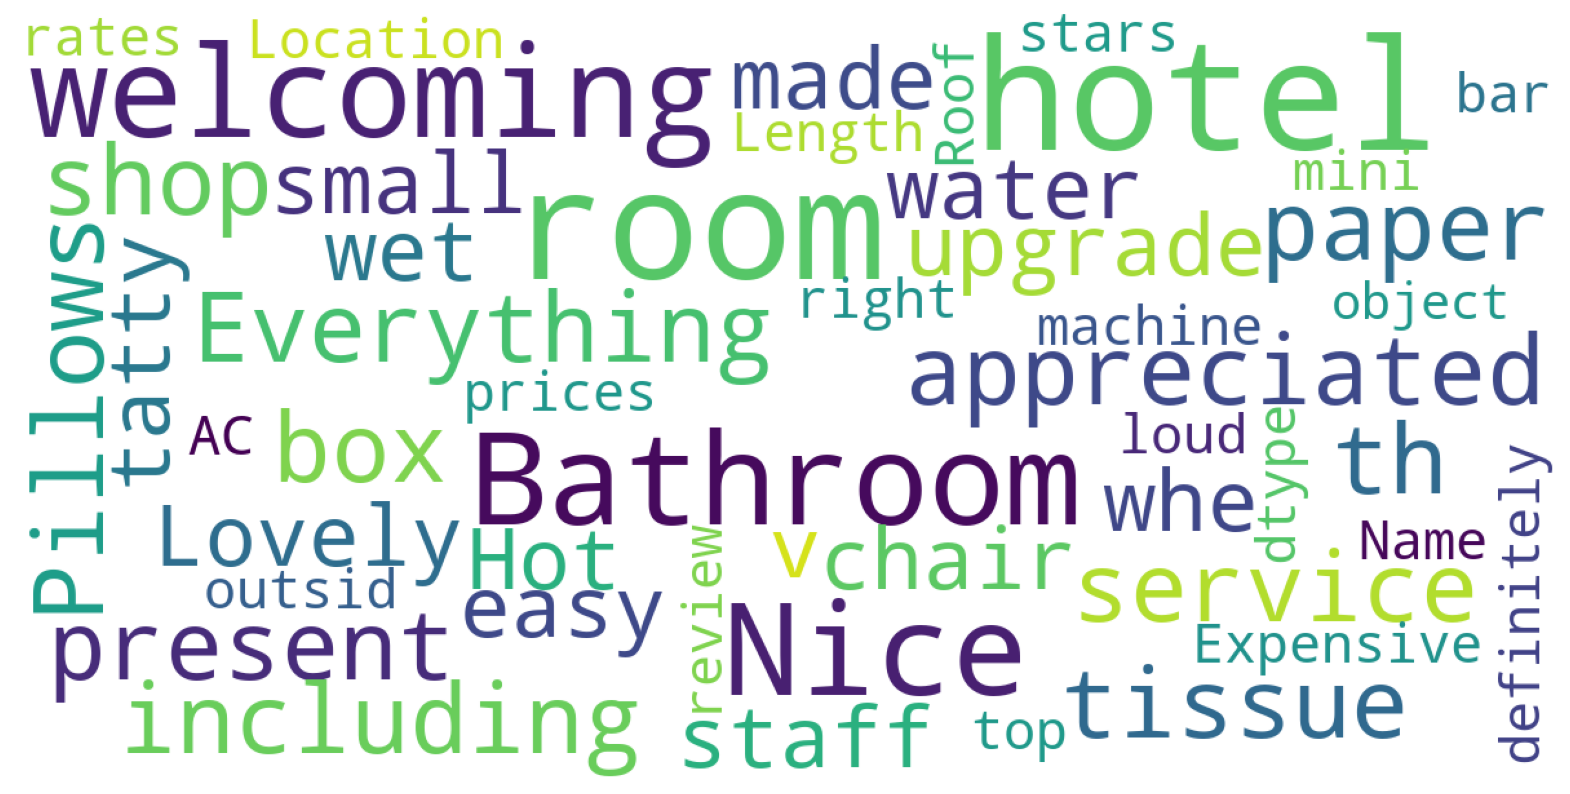

In [37]:
# wordcloud function

from wordcloud import WordCloud
import matplotlib.pyplot as plt

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color = 'white',
        max_words = 200,
        max_font_size = 40, 
        scale = 3,
        random_state = 42
    ).generate(str(data))

    fig = plt.figure(1, figsize = (20, 20))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize = 20)
        fig.subplots_adjust(top = 2.3)

    plt.imshow(wordcloud)
    plt.show()
    
# print wordcloud
show_wordcloud(reviews_df2["review"])

- Most of the words are indeed related to the hotels: room, staff, breakfast, etc.
- Some words are more related to the customer experience with the hotel stay: perfect, loved, expensive, dislike, etc.

### Highest positive sentiment reviews (with more than 5 words)

In [38]:
reviews_df2[reviews_df2["nb_words"] >= 5].sort_values("pos", ascending = False)[["review", "pos"]].head(10)

,review,pos
43101,A perfect location comfortable great value,0.931
211742,Clean comfortable lovely staff,0.907
175551,Friendly welcome Comfortable room,0.905
365085,Good location great value,0.904
109564,Clean friendly and comfortable,0.902
145743,Good value amazing location,0.901
407590,breakfast excellent Clean comfort,0.899
407546,Great place I enjoyed,0.881
218571,Beautiful Quirky Comfortable,0.878
436901,Lovely comfortable rooms,0.877


### Lowest negative sentiment reviews (with more than 5 words)

In [39]:
reviews_df2[reviews_df2["nb_words"] >= 5].sort_values("neg", ascending = False)[["review", "neg"]].head(10)

,review,neg
193086,No dislikes LOCATION,0.831
356368,Nothing Great helpful wonderful staff,0.812
318516,A disaster Nothing,0.804
458794,Nothing Excellent friendly helpful staff,0.799
29666,A bit noisy No,0.796
426057,Dirty hotel Smells bad,0.762
263187,Very bad service No,0.758
443796,Nothing perfect,0.750
181508,Window blind was broken,0.744
175316,Nothing Super friendly staff,0.743


### Plot sentiment distribution for positive and negative reviews

/var/folders/n9/8_4dp_dx4lxd6xq_3fmvcfq80000gn/T/ipykernel_58509/3271467352.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(subset['compound'], hist = False, label = label)
/var/folders/n9/8_4dp_dx4lxd6xq_3fmvcfq80000gn/T/ipykernel_58509/3271467352.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad63

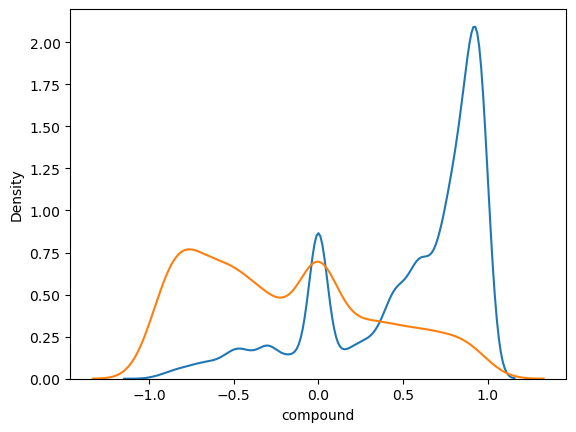

In [40]:
import seaborn as sns

for x in [0, 1]:
    subset = reviews_df2[reviews_df2['is_bad_review'] == x]
    
    # Draw the density plot
    if x == 0:
        label = "Good reviews"
    else:
        label = "Bad reviews"
    sns.distplot(subset['compound'], hist = False, label = label)
    #sns.displot(subset['compound'], label = label, kind="kde")
    #sns.histplot(subset['compound'], label = label, kde=True)

## Modeling Reviewer Score

In [41]:
# feature selection
label = "is_bad_review"
ignore_cols = [label, "review", "review_clean"]
features = [c for c in reviews_df2.columns if c not in ignore_cols]

# split the data into train and test
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(reviews_df2[features], reviews_df2[label], test_size = 0.20, random_state = 32)

- We first choose which features we want to use to train our model. Then we split our data into two parts:

   - one to train our model
   -  one to assess its performances
-  We will next use a Random Forest (RF) classifier for our predictions.

In [42]:
# train a random forest classifier
rf = RandomForestClassifier(n_estimators = 100, random_state = 32)
rf.fit(X_train, y_train)

# show feature importance
feature_importances_df = pd.DataFrame({"feature": features, "importance": rf.feature_importances_}).sort_values("importance", ascending = False)
feature_importances_df.head(20)

,feature,importance
3,compound,0.039554
6,doc2vec_vector_0,0.025094
2,pos,0.024071
0,neg,0.018727
10,doc2vec_vector_4,0.018281
7,doc2vec_vector_1,0.017263
9,doc2vec_vector_3,0.017251
4,nb_chars,0.017211
8,doc2vec_vector_2,0.016508
1,neu,0.016053


-  The most important features are indeed the ones that come from the previous sentiment analysis.
-  The vector representations of the texts also have a lot of importance in our training.
-  Some words appear to have fairly good importance as well.

## RandomForest Classifier

In [43]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred)

NameError: name 'accuracy_score' is not defined

## GaussianNB

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train,y_train)

In [ ]:
y_pred = gnb.predict(X_test)

from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
accuracy_score(y_test,y_pred)

# ROC curve

In [ ]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt

y_pred = [x[1] for x in rf.predict_proba(X_test)]
fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label = 1)

roc_auc = auc(fpr, tpr)

plt.figure(1, figsize = (15, 10))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()


- The ROC (Receiver Operating Characteristic) curve is usually a good graph to summarize the quality of our classifier. The higher the curve is above the diagonal baseline, the better the predictions. Although the AUC ROC (Area Under the Curve ROC) is very good, we should not use here the ROC curve to assess the quality of our model.

- Why? First let us remind the False Positive Rate formula, which corresponds to the x-axis of the ROC curve: FPR (False Positive Rate) = # False Positives / # Negatives.

- Here the # Negatives corresponds to our number of good reviews which is very high because our dataset is imbalanced. This means that even with some False Positives, our FPR will tend to stay very low. Our model will be able to make a lot of false positive predictions and still have a low false positive rate while increasing the true positive rate and therefore artificially increasing the AUC ROC metric.

# PR(Precision-Recall) curve

In [ ]:
from sklearn.metrics import average_precision_score, precision_recall_curve
#from sklearn.utils.fixes import signature
!pip install funcsigs
from funcsigs import signature

average_precision = average_precision_score(y_test, y_pred)

precision, recall, _ = precision_recall_curve(y_test, y_pred)

# In matplotlib < 1.5, plt.fill_between does not have a 'step' argument
step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})

plt.figure(1, figsize = (15, 10))
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))

- A better metric in this imbalanced situation is the AUC PR (Area Under the Curve Precision Recall), also called AP (Average Precision).

- We can see that the precision decreases when we increase the recall. This shows us that we have to choose a prediction threshold adapted to our needs. If our goal is to have a high recall, we should set a low prediction threshold that will allow us to detect most of the observations of the positive class, but with low precision. On the contrary, if we want to be really confident about our predictions but don't mind about not finding all the positive observations, we should set a high threshold that will get us a high precision and a low recall.

- In order to know if our model performs better than another classifier, we can simply use the AP metric. To assess the quality of our model, we can compare it to a simple decision baseline. Let's take a random classifier as a baseline here that would predict half of the time 1 and half of the time 0 for the label.

- Such a classifier would have a precision of 4.3%, which corresponds to the proportion of positive observations. For every recall value, the precision would stay the same, and this would lead us to an AP of 0.043. The AP of our model is approximately 0.38, which is more than 8 times higher than the AP of the random method. This means that our model has good predictive power.

# Conclusion

-  best accuracy_score 95% RandomForest Classifier 